
# EMAIL SPAM DETECTION USING MACHINE LEARNING

Identifying and distinguishing spam emails using ML model.
by Saptarshi Mondal

## Import important Libraries

In [29]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

## Import file

In [30]:
# df = pd.read_csv('/content/Spam dataset.csv')
df= pd.read_csv('/content/emails.csv')

In [31]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [32]:
df.shape

(5728, 2)

Data analysis

In [33]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [34]:
df['text'].str.isspace().sum()

0

In [35]:
df[df.duplicated()]

,text,spam
2155,Subject: research allocations to egm hi becky...,0
2260,Subject: departure of grant masson the resear...,0
2412,"Subject: re : schedule and more . . jinbaek ,...",0
2473,"Subject: day off tuesday stinson , i would l...",0
2763,"Subject: re : your mail zhendong , dr . kami...",0
3123,"Subject: re : grades pam , the students rese...",0
3152,Subject: tiger evals - attachment tiger hosts...,0
3248,"Subject: re : i am zhendong zhendong , thank...",0
3249,Subject: hello from enron dear dr . mcmullen ...,0
3387,"Subject: term paper dr . kaminski , attached...",0


In [36]:
df=df.drop_duplicates()

## Class distribution visualization

<Axes: xlabel='spam'>

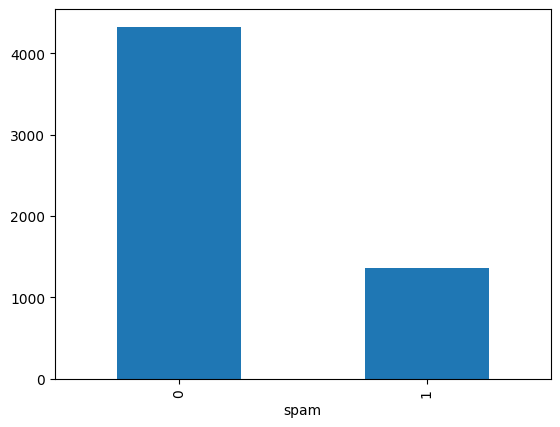

In [37]:
df.groupby(by = 'spam').size().plot(kind='bar')

## EDA

(-100.0, 10000.0)

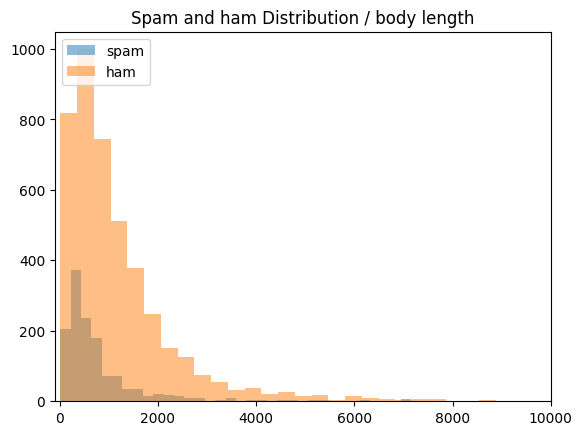

In [123]:

plt.hist(df[df['spam']==1]['text'].apply(lambda x: len(x) - x.count(" ")),bins=100, alpha=0.5, label='spam')
plt.hist(df[df['spam']==0]['text'].apply(lambda x: len(x) - x.count(" ")),bins=100, alpha=0.5, label='ham')
plt.title('Spam and ham Distribution / body length')
plt.legend(loc='upper left')
plt.xlim(-100,10000)

In [142]:
import re

def Find_link(string):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex, string)
    number = len ([x[0] for x in url])
    return number


In [141]:
# Find('www.happy.cpm  ok fine no www.hjdj.com')

2

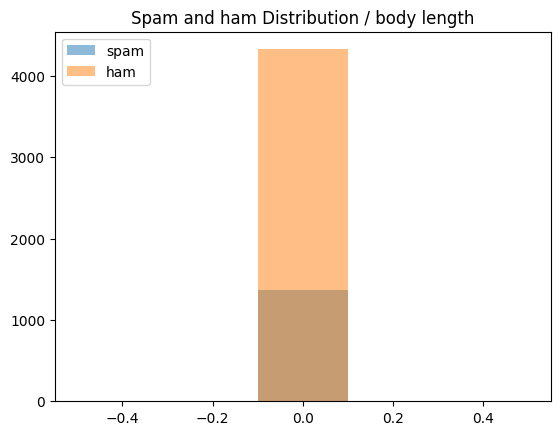

In [151]:
plt.hist(df[df['spam']==1]['text'].apply(Find_link),bins=5, alpha=0.5, label='spam')
plt.hist(df[df['spam']==0]['text'].apply(Find_link),bins=5, alpha=0.5, label='ham')
plt.title('Spam and ham Distribution / body length')
plt.legend(loc='upper left')
# plt.xlim(0.1,5)

Text preprocessing

In [38]:
import nltk
import spacy
import en_core_web_sm
import warnings
warnings.filterwarnings("ignore")

In [39]:
nlp = spacy.load('en_core_web_sm')
from nltk.tokenize import sent_tokenize, word_tokenize

In [44]:
def clean_text(text):
  doc = nlp(text)
  pattern_lemma= " ".join([token.lemma_ for token in doc])
  return pattern_lemma

In [58]:
# chk=df['text'][:10]
# chk
# clean_text('hi, hele . i was ')

In [54]:
df['text']=df['text'].apply(clean_text)

In [55]:
df.head()

,text,spam
0,subject : naturally irresistible your corporat...,1
1,subject : the stock trading gunslinger fanny...,1
2,subject : unbelievable new home make easy I ...,1
3,subject : 4 color printing special request a...,1
4,"subject : do not have money , get software cd ...",1


## data split for train and test

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.3)

In [73]:
print(X_train.shape)


(3986,)


Data Preperation

In [59]:
from sklearn.feature_extraction.text import CountVectorizer


In [65]:
vectorizer = CountVectorizer(stop_words='english')

In [88]:
vectorizer = CountVectorizer(stop_words='english')
cv_fit= vectorizer.fit(X_train)
cv_train= cv_fit.transform(X_train)
cv_test = cv_fit.transform(X_test)


In [89]:
cv_train.shape

(3986, 26884)

In [90]:
len(cv_fit.get_feature_names_out())

26884

In [91]:
X_train_cv= pd.DataFrame(cv_train.toarray(),columns=cv_fit.get_feature_names_out())

In [92]:
X_test_cv= pd.DataFrame(cv_test.toarray(),columns=cv_fit.get_feature_names_out())

In [94]:
# X_train_cv.head()

## Model selection

## RF

In [101]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

rf = RandomForestClassifier(n_estimators=50, max_depth=20)
rf_model = rf.fit(X_train_cv, y_train)

In [98]:
prediction = rf_model.predict(X_test_cv)

In [109]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))




              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1294
           1       1.00      0.71      0.83       415

    accuracy                           0.93      1709
   macro avg       0.96      0.85      0.89      1709
weighted avg       0.94      0.93      0.92      1709

[[1294    0]
 [ 121  294]]
Accuracy of the model on Testing Sample Data: 0.92


## XGBoost

In [110]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Creating the model on Training Data
XGB=clf.fit(X_train_cv,y_train)
prediction=XGB.predict(X_test_cv)



In [111]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1294
           1       0.94      0.98      0.96       415

    accuracy                           0.98      1709
   macro avg       0.97      0.98      0.97      1709
weighted avg       0.98      0.98      0.98      1709

[[1268   26]
 [   7  408]]
Accuracy of the model on Testing Sample Data: 0.98


accuracy is better in Boosting algorithm
